## TODO:
- Hay casos donde no queda mucho sin tocar. En general, hay que solucionar algunos problemas
- Darle prioridad cuando estan en la misma dirección

In [64]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../src/")
from line_detection.hough import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import os
import cv2
import numpy as np
import pandas as pd
import math
import random
from PIL import Image
from IPython.display import display

## En vez de puntos, pruebo con imagenes

In [44]:
OFFSET_TABLAS = 5
BASE_FOLDER = "../data/imagenes_diagramas/"
IMGS = sorted([os.path.join(BASE_FOLDER,img_path) for img_path in os.listdir(BASE_FOLDER)])

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


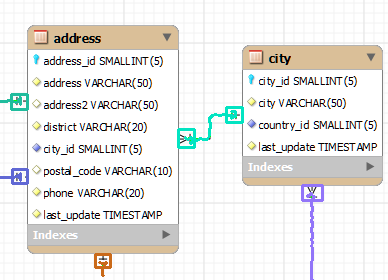

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12
Increasing offset to 14
Increasing offset to 16


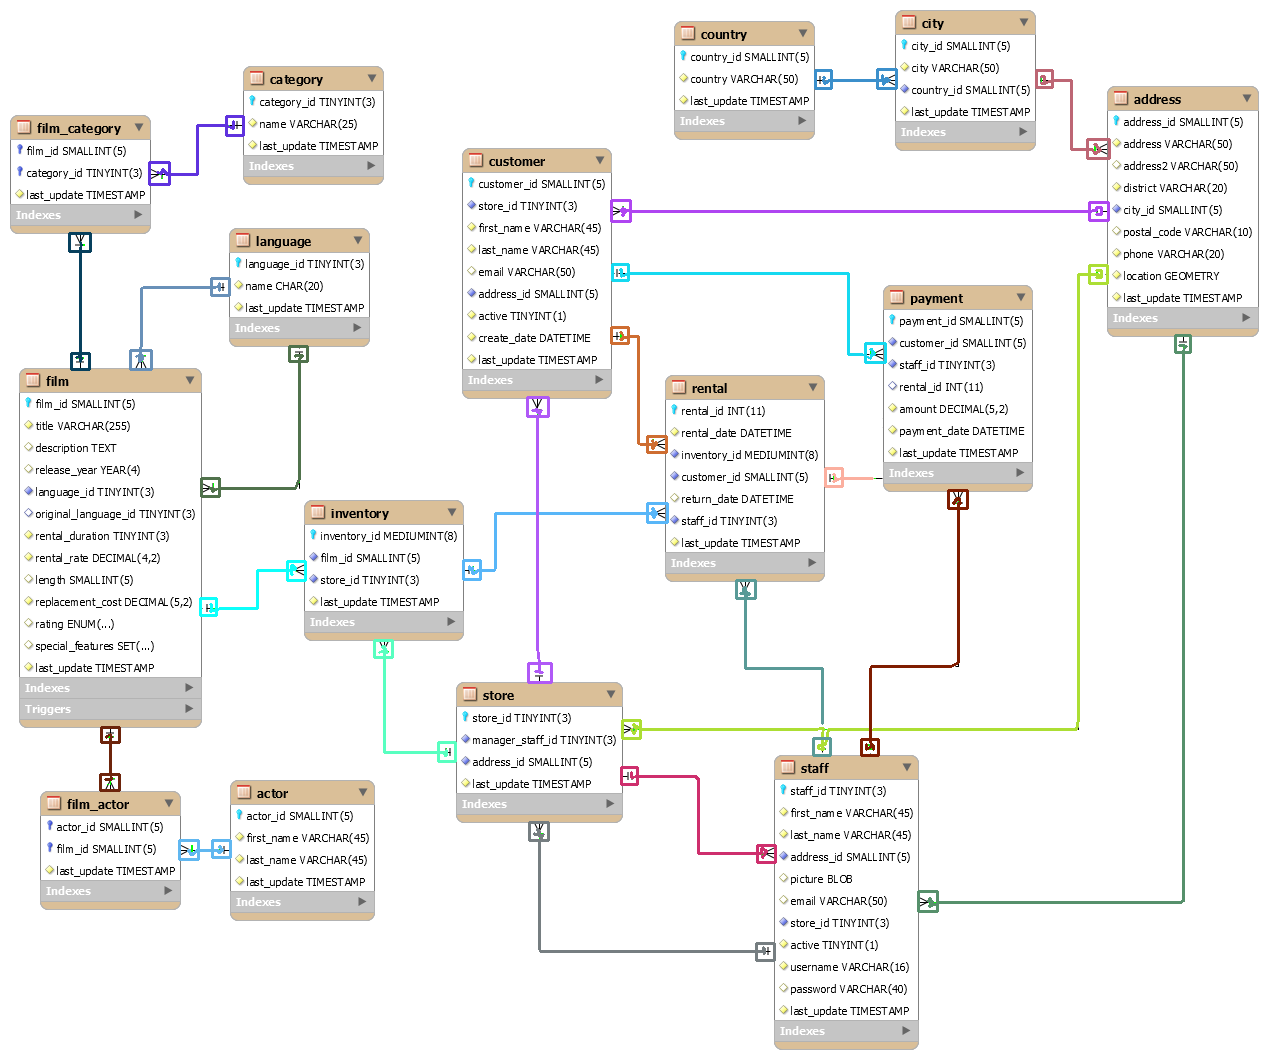

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Increasing offset to 2
Increasing offset to 4
Increasing offset to 6
Increasing offset to 8
Increasing offset to 10
Increasing offset to 12


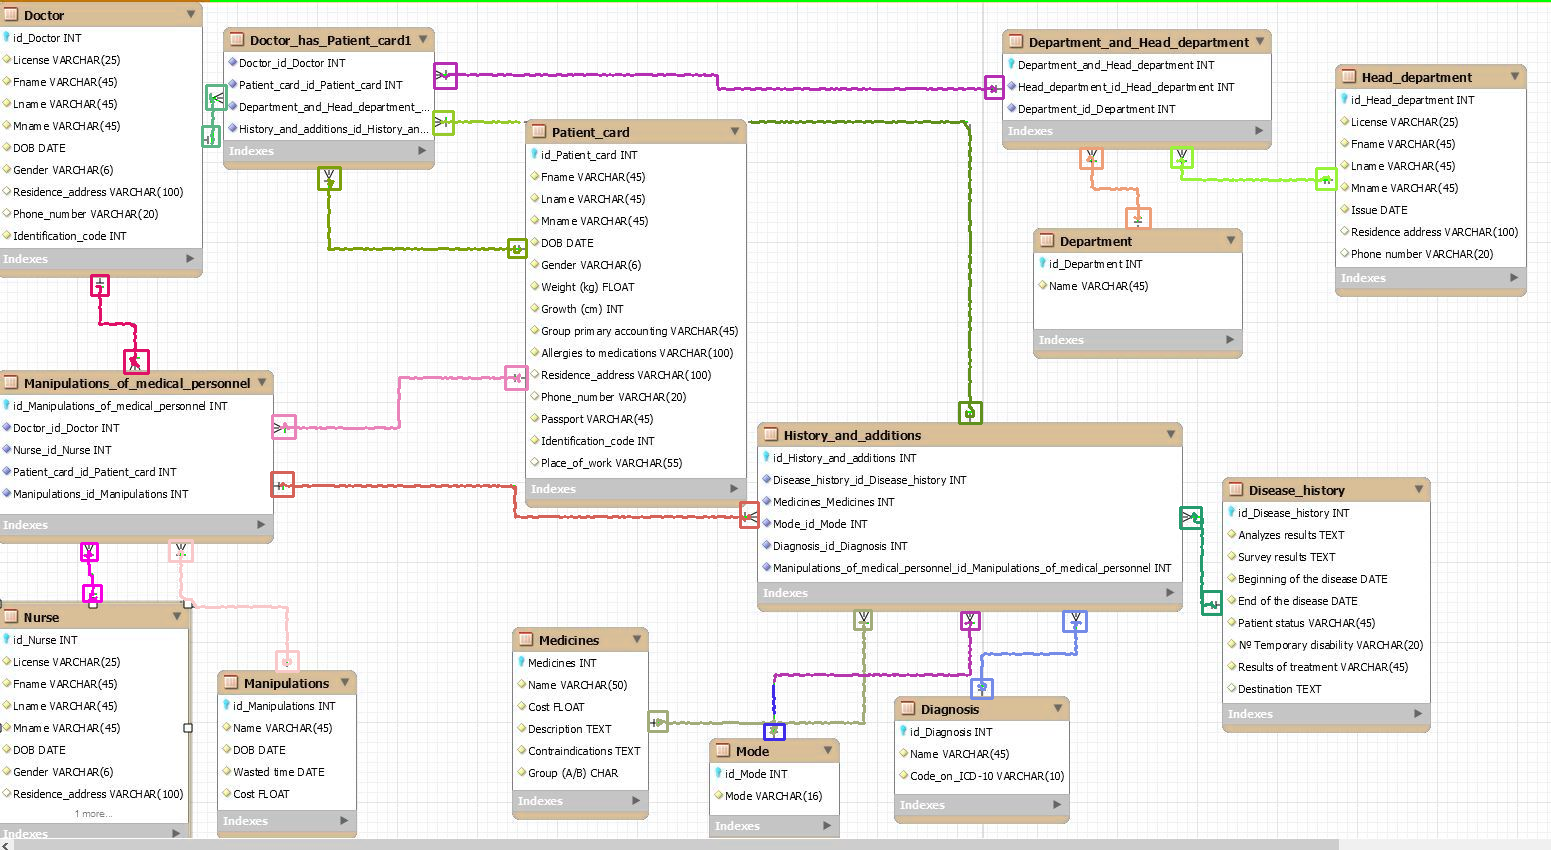

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


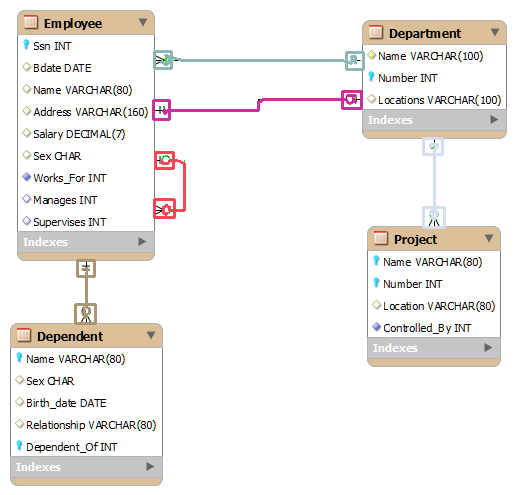

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


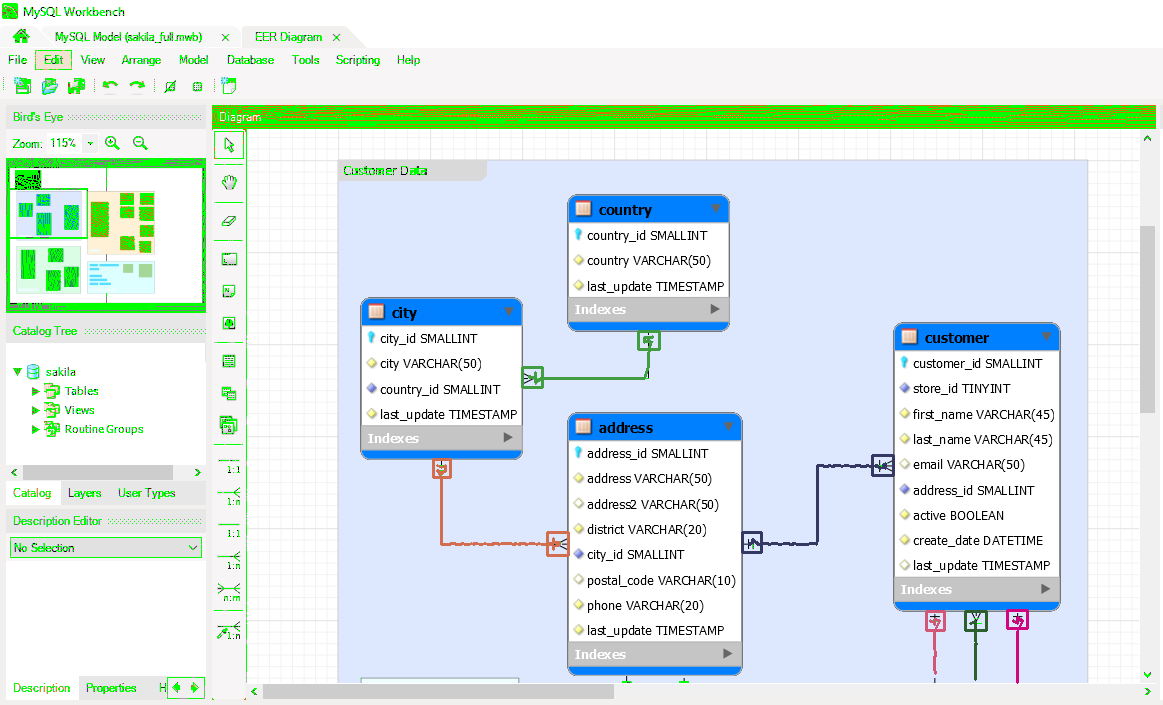

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


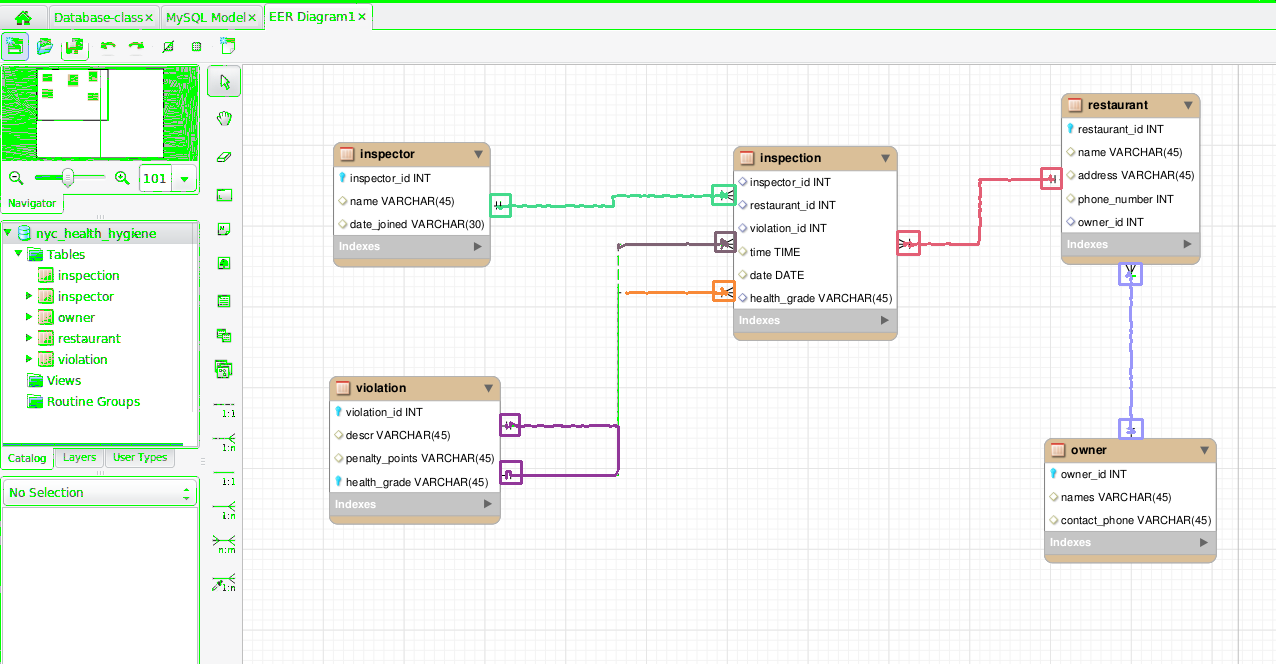

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


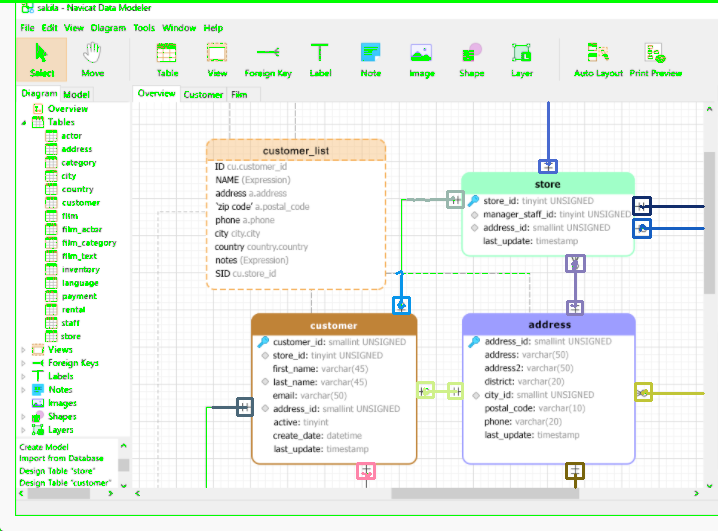

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


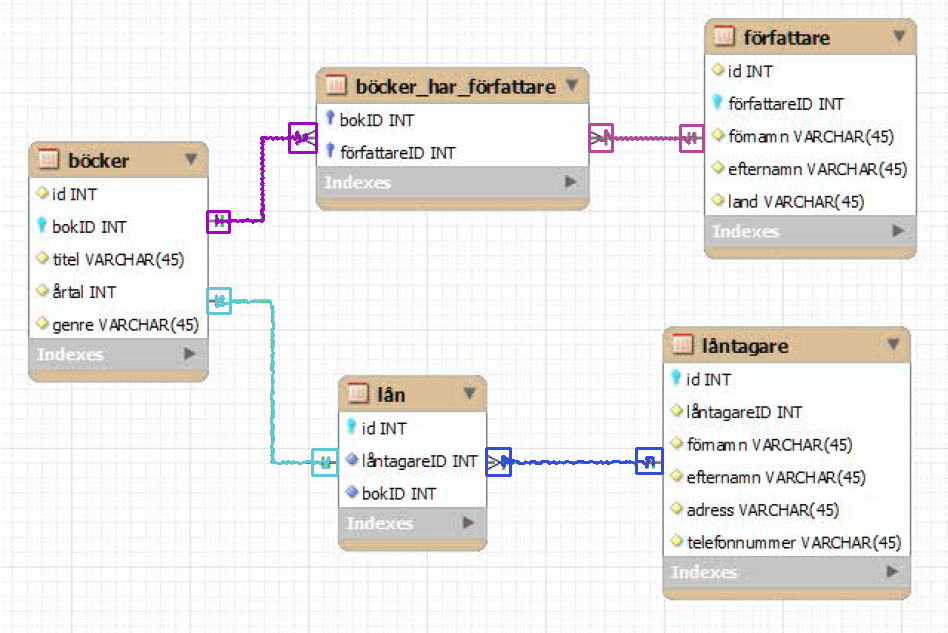

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: min() arg is an empty sequence

In [45]:
for img_path in IMGS[2:]:
    img_basename = os.path.basename(img_path)
    tablas, cardinalidades = get_tablas(img_basename)
    #Agrandamos un toque las cajas
    offset = np.array([-OFFSET_TABLAS, -OFFSET_TABLAS, OFFSET_TABLAS, OFFSET_TABLAS]).reshape(1,4)
    tablas = np.sum([tablas, offset])

    #No le paso las cardinalidades.
    img, all_lines = apply_hough(img_path, tablas, [])

    all_points = lines_to_points(all_lines)
    plotted_points = plot_points(img, all_points)
    lines = hough_detecting(all_points)
    plotted_lines = plot_lines(img, lines)

    factor = 0.7
    final_results = unify_cardinalidades(img, lines, cardinalidades)
    final_results = final_results.resize((int(d*factor) for d in final_results.size))

    display(final_results)

## Chequeo de a uno solo para debuggear

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


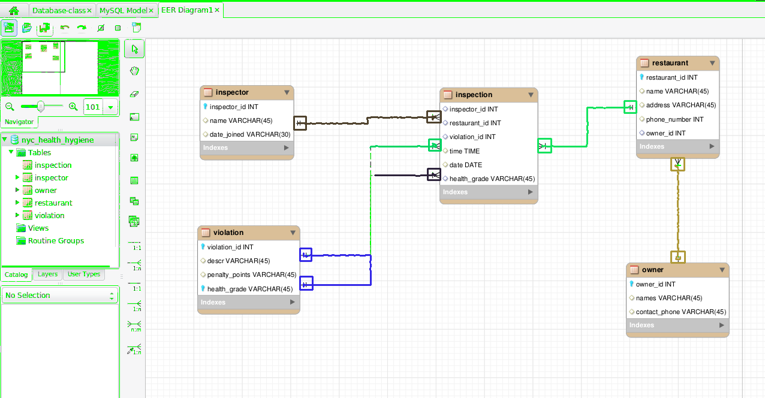

In [92]:
img_path = "/home/nacho/TFI-Cazcarra/data/imagenes_diagramas/ERDiagramsMySQL-17.png"
img_basename = os.path.basename(img_path)
tablas, cardinalidades = get_tablas(img_basename)
#Agrandamos un toque las cajas
offset = np.array([-OFFSET_TABLAS, -OFFSET_TABLAS, OFFSET_TABLAS, OFFSET_TABLAS]).reshape(1,4)
tablas = np.sum([tablas, offset])

#No le paso las cardinalidades.
img, all_lines = apply_hough(img_path, tablas, [])

all_points = lines_to_points(all_lines, max_dst_per_points=5)
plotted_points = plot_points(img, all_points)
lines = hough_detecting(all_points, dst_threhold=30)
plotted_lines = plot_lines(img, lines)

factor = 0.6
final_results = unify_cardinalidades(img, lines, cardinalidades)
final_results = final_results.resize((int(d*factor) for d in final_results.size))

display(final_results)

In [ ]:
plotted_points

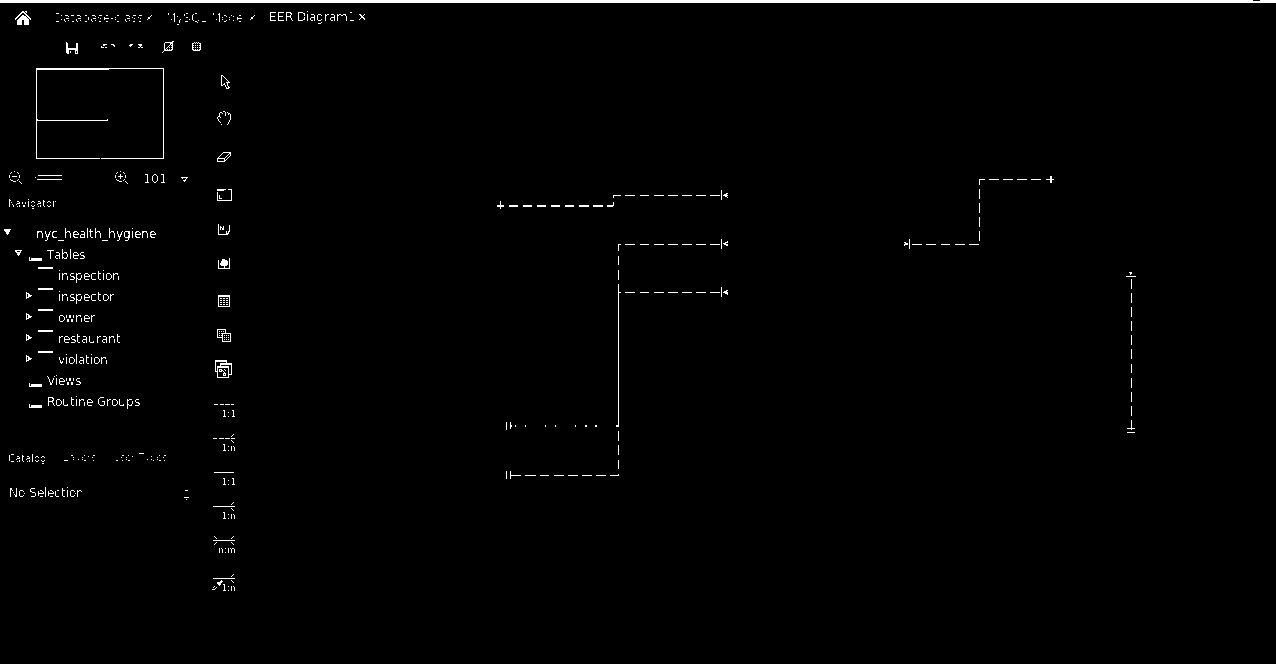

In [60]:
inputImage = cv2.imread(img_path)
inputImageGray = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)

#edges = cv2.Canny(inputImageGray, 150, 200, apertureSize = 3)
ret, thresh = cv2.threshold(inputImageGray, 125, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

edges = np.zeros(inputImage.shape, dtype = np.uint8) # Creamos una imagen en negro
edges = cv2.drawContours(edges, contours, -1, (255, 255, 255), -1)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)

minLineLength = 500
maxLineGap = -1

for t in tablas:
    edges = cv2.rectangle(edges, t[:2], t[2:], color=(0,0,0), thickness=-1)
    
display(Image.fromarray(edges))

In [46]:
all_points

{0: [0.0, 0.0],
 1: [0.0, 1.0],
 2: [0.0, 3.0],
 3: [0.0, 4.0],
 4: [0.0, 5.0],
 5: [0.0, 7.0],
 6: [0.0, 8.0],
 7: [0.0, 9.0],
 8: [0.0, 10.0],
 9: [0.0, 17.0],
 10: [0.0, 19.0],
 11: [0.0, 20.0],
 12: [0.0, 21.0],
 13: [0.0, 22.0],
 14: [0.0, 24.0],
 15: [0.0, 83.0],
 16: [0.0, 88.02395209580845],
 17: [0.0, 93.0479041916168],
 18: [0.0, 98.07185628742513],
 19: [0.0, 103.09580838323348],
 20: [0.0, 108.11976047904193],
 21: [0.0, 113.14371257485027],
 22: [0.0, 118.16766467065872],
 23: [0.0, 123.19161676646706],
 24: [0.0, 128.2155688622754],
 25: [0.0, 133.23952095808386],
 26: [0.0, 138.2634730538922],
 27: [0.0, 143.28742514970065],
 28: [0.0, 148.311377245509],
 29: [0.0, 153.33532934131733],
 30: [0.0, 158.3592814371258],
 31: [0.0, 163.38323353293413],
 32: [0.0, 168.40718562874258],
 33: [0.0, 173.43113772455092],
 34: [0.0, 178.45508982035926],
 35: [0.0, 183.4790419161676],
 36: [0.0, 188.50299401197606],
 37: [0.0, 193.5269461077845],
 38: [0.0, 198.55089820359274],
 39: 

## Para plotear dos imagenes juntas. Ignorar

In [ ]:
i1 = cv2.imread("../data/imagenes_extra/recta_a.png")
i2 = cv2.imread("../data/imagenes_extra/recta_B.png")

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 8, 8

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(i1)
ax[1].imshow(cv2.cvtColor(i2, cv2.COLOR_BGR2RGB))

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()